## Breaking the dataset into training and testing

In [29]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

## Applying Machine Learning Algorithms


## Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be used are:

## Logistic Regression
## Support Vector Machine
## Naive Bayes
## K-Nearest Neighbors
## Random Forest
## Ada Boost
## XGBoost

## The metrics we'll use initially are:

## Accuracy
## Precision
## F1-Score

## the main metrics we'll look at are (Reason is mentioned later):

## Recall
## AUC/RUC Curve.

## Logistic Regression


In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [33]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [34]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

## Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.

## Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
## Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

## Now we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

## So, for Type-II Error, We can say that recall is the important metric.

In [35]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## confusion matrix.

In [36]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,50
Not Fraud,36,85271


## Let's draw a heatmap for the above confusion matrix.

<AxesSubplot:>

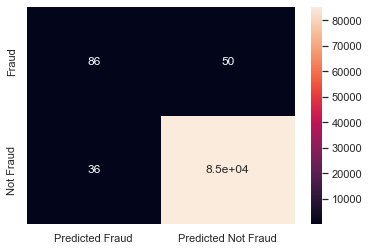

In [38]:
sns.heatmap(conf_matrix, annot=True)

## Heatmap also suggests that the data is highly imbalanced.

#### Let's look at the accuracy score.



In [39]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9989934810341398

#### We can see here that accuracy is great. Around 99%.